In [474]:
import numpy as np
import random
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
import os

seed = 42
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.manual_seed(seed)
torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.enabled = False
torch.backends.cudnn.benchmark = False

In [475]:
pip install --upgrade yfinance

In [476]:
stockList = ['XLE', 'XME', 'PPA', 'ITB', 'IYK', 'XLV', 'IAI', 'VGT', 'VOX', 'XLU', 'REZ']
rawData = yf.download(stockList, '2012-01-01', '2024-12-31', auto_adjust=True)
rawData = rawData['Close']
returns = rawData.pct_change().dropna()

[*********************100%***********************]  11 of 11 completed


In [477]:
train_ret, temp_ret = train_test_split(returns, test_size=0.2, shuffle=False, random_state=seed)
val_ret, test_ret = train_test_split(temp_ret, test_size=0.5, shuffle=False, random_state=seed)

In [478]:
train_ret

Ticker,IAI,ITB,IYK,PPA,REZ,VGT,VOX,XLE,XLU,XLV,XME
Date,,,,,,,,,,,
2012-01-04,-0.008837,0.011551,0.002186,-0.000542,-0.020740,0.000964,-0.010698,0.002111,-0.005659,-0.004838,0.002515
2012-01-05,0.008447,0.026101,0.003782,-0.003250,0.010129,0.007385,-0.008554,-0.004776,0.001992,0.002860,-0.010421
2012-01-06,-0.005118,-0.009539,-0.005216,0.001087,-0.005470,0.000637,-0.001465,-0.005927,-0.005396,0.001711,0.000585
2012-01-09,0.000935,0.007223,0.002476,0.003257,-0.004354,0.000000,0.001630,0.004827,0.001428,0.001708,-0.004482
2012-01-10,0.025234,0.021514,0.006828,0.015151,0.010127,0.005096,0.006999,0.008901,0.001425,0.007388,0.027408
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17,0.026637,0.026952,0.000721,0.023742,0.008471,0.028307,0.022896,0.011579,0.010328,0.013740,0.042469
2022-05-18,-0.032971,-0.054172,-0.055113,-0.024029,-0.025790,-0.046096,-0.030814,-0.025635,-0.009669,-0.025813,-0.041500
2022-05-19,0.000586,0.005692,-0.017681,-0.008732,-0.006072,-0.006979,-0.000800,-0.003671,-0.002093,0.002189,0.016087


In [479]:
val_ret

Ticker,IAI,ITB,IYK,PPA,REZ,VGT,VOX,XLE,XLU,XLV,XME
Date,,,,,,,,,,,
2022-05-24,-0.010452,-0.027685,0.016057,0.001290,0.008617,-0.019338,-0.038716,0.003813,0.019973,0.002979,-0.010080
2022-05-25,0.012170,0.041893,0.002286,0.006872,0.004865,0.014338,0.015925,0.020653,-0.000675,-0.000305,0.015178
2022-05-26,0.029378,0.040209,0.005008,0.013081,-0.001417,0.025357,0.021339,0.011048,0.002838,0.004266,0.033687
2022-05-27,0.022149,0.019913,0.008288,0.020772,0.021996,0.034849,0.023963,0.018288,0.015631,0.016612,0.017759
2022-05-31,-0.003989,-0.009680,-0.008220,-0.007700,-0.011803,-0.008130,-0.000774,-0.015023,-0.013799,-0.013356,-0.035258
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06,-0.004567,0.010302,-0.002741,-0.011079,-0.001722,-0.011443,-0.003500,0.000438,0.002270,-0.005447,-0.007242
2023-09-07,-0.000854,0.007470,0.003631,-0.002048,0.002443,-0.014967,-0.004344,-0.000986,0.013103,0.004487,-0.007679
2023-09-08,0.007689,-0.004472,0.001499,-0.006760,-0.006595,0.001285,0.001392,0.009652,0.008782,0.000000,-0.005224


In [480]:
test_ret

Ticker,IAI,ITB,IYK,PPA,REZ,VGT,VOX,XLE,XLU,XLV,XME
Date,,,,,,,,,,,
2023-09-13,-0.000630,-0.010555,0.001797,-0.005607,-0.008445,0.001347,0.000000,-0.007529,0.011965,0.000151,0.007539
2023-09-14,0.021760,0.015396,0.009739,0.009684,0.018912,0.007003,0.012356,0.011704,0.014624,0.003162,0.034152
2023-09-15,-0.006893,-0.028056,-0.006498,-0.005949,-0.000567,-0.018193,-0.012934,-0.014460,-0.004293,-0.007881,-0.010575
2023-09-18,0.001554,0.004176,0.002044,0.006446,-0.012050,0.004058,0.001107,0.008474,-0.000745,-0.001519,-0.007750
2023-09-19,-0.001965,0.001590,-0.002142,-0.005833,-0.002583,-0.001775,0.000830,-0.009337,-0.005437,0.000837,-0.006825
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.003540,-0.000287,-0.003786,0.000794,0.001986,0.009246,0.009277,0.005873,0.003404,0.009987,0.006079
2024-12-24,0.015287,0.004690,0.004865,0.007501,0.008175,0.010981,0.009699,0.008459,0.005522,0.004108,0.002977
2024-12-26,0.003066,-0.000191,0.001815,0.003508,-0.000369,0.001738,-0.001256,-0.000827,-0.002354,0.002010,0.002095


In [481]:
def create_covariance_matrix(returns):
    covariances = []
    for i in range(1, len(returns)):
        cov = returns.iloc[i-1: i+1].cov()
        covariances.append(cov)
    return np.array(covariances)

train_cov = create_covariance_matrix(train_ret)
val_cov = create_covariance_matrix(val_ret)
test_cov = create_covariance_matrix(test_ret)
len(train_cov), len(val_cov), len(test_cov)

(2613, 326, 326)

In [482]:
sequence_length = 10
X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], []
for i in range(len(train_cov) - sequence_length):
    X_train.append(train_cov[i:i+sequence_length])
    y_train.append(train_cov[i+sequence_length])
for i in range(len(val_cov) - sequence_length):
    X_val.append(val_cov[i:i+sequence_length])
    y_val.append(val_cov[i+sequence_length])
for i in range(len(test_cov) - sequence_length):
    X_test.append(test_cov[i:i+sequence_length])
    y_test.append(test_cov[i+sequence_length])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
len(X_train), len(y_train), len(X_val), len(y_val), len(X_test), len(y_test)

(2603, 2603, 316, 316, 316, 316)

In [483]:
class CovarianceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

from torch.utils.data import Dataset, DataLoader, Subset
train_dataset = CovarianceDataset(X_train, y_train)
val_dataset = CovarianceDataset(X_val, y_val)
test_dataset = CovarianceDataset(X_test, y_test)

def worker_init_fn(worked_id):
  worker_seed = torch.initial_seed()
  np.random.seed(worker_seed)
  random.seed(worker_seed)

In [484]:
train_loader = DataLoader(train_dataset, batch_size=316, worker_init_fn=worker_init_fn, num_workers=0)
val_loader = DataLoader(val_dataset)
test_loader = DataLoader(test_dataset)

Transformer

In [485]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        pe = torch.zeros(1, max_len, d_model)
        pe[0, :, 0::2] = torch.sin(position * div_term)
        pe[0, :, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return x

class SymmetryEnforcer(nn.Module):
    def forward(self, x):
        return 0.5 * (x + x.transpose(-1, -2))

In [486]:
class PSDEigenFix(nn.Module):
    def forward(self, x):
        x = 0.5 * (x + x.transpose(-1, -2))

        eye = torch.eye(x.size(-1), device=x.device).expand_as(x)
        x_reg = x + 1e-12 * eye

        eigenvalues, eigenvectors = torch.linalg.eigh(x_reg)

        min_eig = torch.clamp(eigenvalues, min=1e-6)

        return eigenvectors @ torch.diag_embed(min_eig) @ eigenvectors.transpose(-1, -2)

In [293]:
class Transformer(nn.Module):
    def __init__(self, num_assets=11, seq_len=10, d_model=256, nhead=8,
                 dropout_rate=0.3, num_layers=4, use_pos_enc=True):
        super().__init__()
        self.num_assets = num_assets
        self.seq_len = seq_len
        self.use_pos_enc = use_pos_enc
        self.d_model = d_model

        self.input_proj = nn.Sequential(
            nn.Linear(num_assets**2, d_model),
            nn.LayerNorm(d_model)
        )

        if use_pos_enc:
            self.pos_encoder = PositionalEncoding(d_model, max_len=seq_len)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dropout=dropout_rate,
            batch_first=True,
            activation='gelu'
        )

        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers,
            norm=nn.LayerNorm(d_model)
        )

        self.decoder = nn.Sequential(
            nn.Linear(d_model*seq_len, 512),
            nn.GELU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, num_assets**2)
        )

        self.symmetry_enforcer = SymmetryEnforcer()
        self.psd_projection = PSDEigenFix()

    def forward(self, x):
        batch_size = x.size(0)

        x = x.view(batch_size, self.seq_len, -1)
        x = self.input_proj(x)

        if self.use_pos_enc:
            x = self.pos_encoder(x)

        x = self.transformer(x)

        x = x.view(batch_size, -1)
        x = self.decoder(x)

        x = x.view(-1, self.num_assets, self.num_assets)
        x = self.symmetry_enforcer(x)
        x = self.psd_projection(x)

        return x

In [487]:
def train_model():
    model = Transformer(
        num_layers=4,
        d_model=256,
        nhead=8,
        dropout_rate=0.3
    )

    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
    criterion = nn.MSELoss()

    best_loss = float('inf')
    patience = 15
    early_stop_counter = 0
    train_losses = []
    val_losses = []

    for epoch in range(200):
        model.train()
        epoch_train_loss = 0.0

        # Training loop
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(pred, y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            epoch_train_loss += loss.item()

        # Validation loop
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for x, y in val_loader:
                pred = model(x)
                loss = criterion(pred, y)
                epoch_val_loss += loss.item()

        avg_train_loss = epoch_train_loss / len(train_loader)
        avg_val_loss = epoch_val_loss / len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        # Early stopping check
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        print(f'Epoch {epoch+1:03d} | '
              f'Train Loss: {avg_train_loss} | '
              f'Val Loss: {avg_val_loss}')

    model.load_state_dict(torch.load('best_model.pth'))
    return model

transformer = train_model()

Epoch 001 | Train Loss: 0.0027365975632468085 | Val Loss: 1.269090919427171e-07
Epoch 002 | Train Loss: 4.174732970972804e-06 | Val Loss: 1.2690909195466254e-07
Epoch 003 | Train Loss: 1.6692829123914837e-06 | Val Loss: 1.2690909194974382e-07
Epoch 004 | Train Loss: 1.122577733288684e-06 | Val Loss: 1.2690909191794787e-07
Epoch 005 | Train Loss: 7.966542667029822e-07 | Val Loss: 1.2690909194833849e-07
Epoch 006 | Train Loss: 6.521122368023194e-07 | Val Loss: 1.2690909195220318e-07
Epoch 007 | Train Loss: 8.568093699226312e-07 | Val Loss: 1.2690909195325718e-07
Epoch 008 | Train Loss: 7.971148446491346e-07 | Val Loss: 1.269090919543112e-07
Epoch 009 | Train Loss: 6.744568336911369e-07 | Val Loss: 1.2690909193287968e-07
Epoch 010 | Train Loss: 8.215757176799343e-07 | Val Loss: 1.2690909195466254e-07
Epoch 011 | Train Loss: 7.853204236043767e-07 | Val Loss: 1.2690909195395987e-07
Epoch 012 | Train Loss: 6.200742199208914e-07 | Val Loss: 1.2690909194183875e-07
Epoch 013 | Train Loss: 6.243

In [488]:
def evaluate_model(model, test_loader):
    pred_cov = []
    act_cov=[]
    model.eval()
    criterion = nn.MSELoss()
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            pred = model(x)
            pred_cov.append(pred)
            act_cov.append(y)
            test_loss += criterion(pred, y).item()
    print(f'Test Loss: {test_loss/len(test_loader)}')
    return pred_cov, act_cov

best_model = Transformer(
        num_layers=4,
        d_model=256,
        nhead=8,
        dropout_rate=0.3
    )
best_model.load_state_dict(torch.load('best_model.pth'))
best_model.eval()

test_loader = DataLoader(test_dataset)
pred_cov_trans, act_cov_trans = evaluate_model(best_model, test_loader)

Test Loss: 3.1978617424150853e-08


In [489]:
TransErrorTerms = []
for i in range(len(pred_cov_trans)):
   error_mat = np.array(act_cov_trans[i]-pred_cov_trans[i]).reshape(1,-1)[0]
   for error in error_mat:
        TransErrorTerms.append(error)

10-Day Average

In [490]:
pred_cov_avg = []
act_cov_avg=[]

for i in range(len(X_test)):
    X = X_test[i]
    y = y_test[i]
    temp = X[0]
    for j in range(1, len(X)):
      temp = temp + X[j]
    pred = temp / 10
    pred_cov_avg.append(pred)
    act_cov_avg.append(y)

In [491]:
AvgErrorTerms = []
for i in range(len(pred_cov_avg)):
   error_mat = np.array(act_cov_avg[i]-pred_cov_avg[i]).reshape(1,-1)[0]
   for error in error_mat:
        AvgErrorTerms.append(error)

In [492]:
AveErrorCount = pd.DataFrame(AvgErrorTerms, columns=['errors']).value_counts(normalize=True)*100
AveErrorCount = AveErrorCount.reset_index(name='count')
print("MSE: ", np.square(AveErrorCount['errors']).mean())

MSE:  3.355785373031588e-08


EWMA

In [493]:
def ewma_weight_matrix(span, alpha):
  weights = np.zeros((span, span))
  for i in range(span):
      for j in range(i + 1):
          weights[i, j] = (1 - alpha) ** (i - j)
      weights[i, :] *= alpha / (1 - (1 - alpha) ** (i + 1))
  return weights[-1]


pred_cov_ewm = []
act_cov_ewm=[]

for i in range(len(X_test)):
  X = X_test[i]
  y = y_test[i]
  pred = sum(w * m for w, m in zip(ewma_weight_matrix(30, 0.05), X_test[0]))
  pred_cov_ewm.append(pred)
  act_cov_ewm.append(y)

In [494]:
EWMErrorTerms = []
for i in range(len(pred_cov_ewm)):
   error_mat = np.array(act_cov_ewm[i]-pred_cov_ewm[i]).reshape(1,-1)[0]
   for error in error_mat:
        EWMErrorTerms.append(error)

In [495]:
EWMAErrorCount = pd.DataFrame(EWMErrorTerms, columns=['errors']).value_counts(normalize=True)*100
EWMAErrorCount = EWMAErrorCount.reset_index(name='count')
print("MSE: ", np.square(EWMAErrorCount['errors']).mean())

MSE:  3.406550095089068e-08


HAR-Cholesky

In [496]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from scipy.linalg import toeplitz
import warnings

class HARCholeskyPredictor:
    def __init__(self, n_assets, windows=(1, 5, 22), epsilon=1e-6,
                 diag_range=(1e-4, 1e-2), corr_bound=0.98, alpha=0.5):
        self.n_assets = n_assets
        self.windows = windows
        self.epsilon = epsilon
        self.diag_range = diag_range
        self.corr_bound = corr_bound
        self.alpha = alpha
        self.models = {}
        self.scalers = {}
        self.chol_indices = list(zip(*np.tril_indices(n_assets)))
        self.eye = np.eye(n_assets)
        self.baseline_cov = None

    def _differentiable_psd(self, cov_matrix):
        diag = np.diag(cov_matrix)
        scaled_diag = np.clip(diag, *self.diag_range)
        cov_matrix = np.diag(scaled_diag) + 0.5*(cov_matrix + cov_matrix.T - 2*np.diag(diag))
        return cov_matrix + self.eye * self.epsilon

    def _volatility_scaling(self, series):
        if len(series) < 5:
            return 1.0
        rolling_std = np.nanstd(series[-5:])
        return rolling_std if rolling_std > 1e-8 else 1.0

    def _create_features(self, series):
        series = np.asarray(series).ravel()
        if series.size == 0:
            return np.zeros(5)

        vol_scale = self._volatility_scaling(series)
        scaled_series = series / vol_scale

        features = [
            scaled_series[-1],
            np.nanmean(scaled_series[-3:]),
            np.nanmax(scaled_series[-5:]) - np.nanmin(scaled_series[-5:]),
            np.nanstd(scaled_series[-5:]),
            toeplitz(np.arange(3))[0, :].dot(scaled_series[-3:]) if len(scaled_series) >=3 else 0
        ]
        return np.array(features)

    def fit(self, train_cov):
        self.baseline_cov = np.mean(train_cov, axis=0)

        chol_series = [self._differentiable_psd(c) - self.baseline_cov for c in train_cov]

        for (i, j) in self.chol_indices:
            X, y = [], []

            for t in range(max(self.windows), len(chol_series)):
                history = chol_series[t-max(self.windows):t]
                series_vals = [L[i,j] for L in history]

                features = self._create_features(series_vals)
                target = chol_series[t][i,j]

                X.append(features)
                y.append(target)

            if len(X) > 25:
                self.scalers[(i,j)] = RobustScaler().fit(X)
                X_scaled = self.scalers[(i,j)].transform(X)

                model = ElasticNet(alpha=self.alpha,
                                 l1_ratio=0.7,
                                 max_iter=10000)
                model.fit(X_scaled, y)
                self.models[(i,j)] = model

    def predict(self, test_cov):
        predictions = []
        baseline = self.baseline_cov

        for cov in test_cov:
            residual_L = np.zeros((self.n_assets, self.n_assets))
            diag_vals = np.ones(self.n_assets)

            for (i, j) in self.chol_indices:
                if (i,j) in self.models:
                    history = [self._differentiable_psd(c) - baseline for c in test_cov]
                    series_vals = [L[i,j] for L in history[-max(self.windows):]]

                    features = self._create_features(series_vals)
                    X_scaled = self.scalers[(i,j)].transform([features])
                    pred = self.models[(i,j)].predict(X_scaled)[0]

                    if i != j:
                        max_val = self.corr_bound * np.sqrt(diag_vals[i] * diag_vals[j])
                        pred = np.clip(pred, -max_val, max_val)
                else:
                    pred = 0.0

                residual_L[i,j] = pred
                if i == j:
                    diag_vals[i] = pred + baseline[i,i]

            pred_cov = baseline + residual_L @ residual_L.T
            pred_cov = self._differentiable_psd(pred_cov)
            predictions.append(pred_cov)

        return predictions

In [497]:
har = HARCholeskyPredictor(n_assets=11)
har.fit(train_cov)
pred_cov_har = har.predict(test_cov)
act_cov_har = test_cov

In [498]:
pred_cov_har = pred_cov_har[10:]
act_cov_har = test_cov[10:]

In [499]:
HARErrorTerms = []
for i in range(len(pred_cov_har)):
   error_mat = np.array(test_cov[i]-pred_cov_har[i]).reshape(1,-1)[0]
   for error in error_mat:
        HARErrorTerms.append(error)

In [500]:
HARErrorCount = pd.DataFrame(HARErrorTerms, columns=['errors']).value_counts(normalize=True)*100
HARErrorCount = HARErrorCount.reset_index(name='count')
print("MSE: ", np.square(HARErrorCount['errors']).mean())

MSE:  3.749878374351143e-08


Error Plot

<ipython-input-501-7d6aab14b924>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Transformer", "Average", "EWMA", "HAR"])


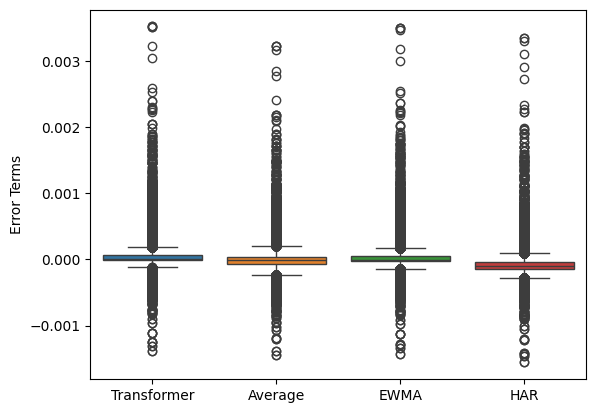

In [501]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [TransErrorTerms, AvgErrorTerms, EWMErrorTerms, HARErrorTerms]
ax = plt.subplot()
sns.boxplot(data)
ax.set_xticklabels(["Transformer", "Average", "EWMA", "HAR"])
plt.ylabel("Error Terms")
plt.show()

Portfolio Construction

Without transaction fee

<ipython-input-502-943b210efcb5>:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  vp=cmath.sqrt(abs(np.dot(w,np.dot(cov_matrix,w.T))))
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_numdiff.py:619: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:429: ComplexWarning: Casting complex values to real discards the imaginary part
  slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw,


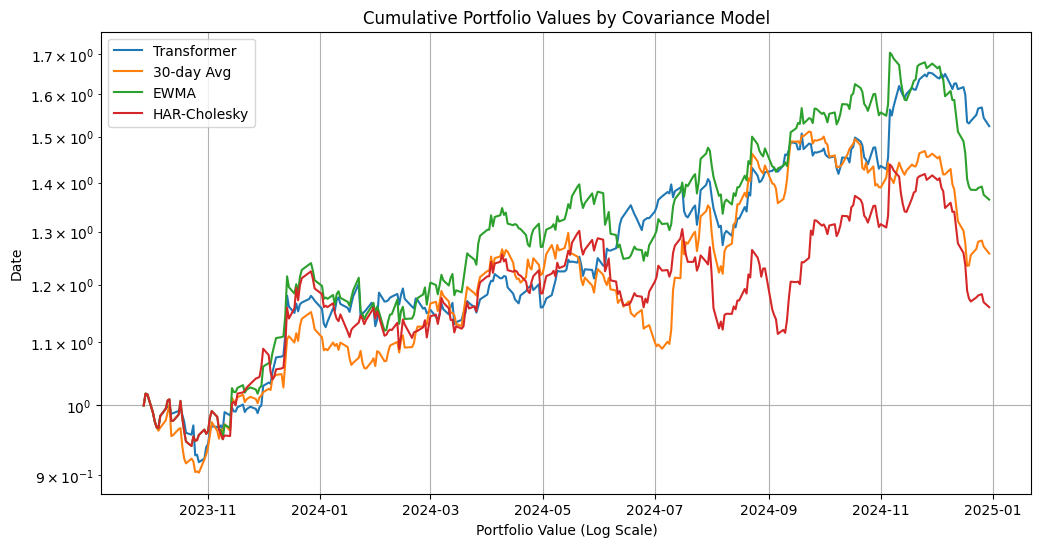

Final Portfolio Values:
Transformer     1.525053
30-day Avg      1.258022
EWMA            1.364708
HAR-Cholesky    1.160069
Name: 2024-12-30 00:00:00, dtype: object


In [502]:
from scipy.optimize import minimize
import cmath
import scipy.optimize as sco

def max_sharpe_weights(expected_returns, cov_matrix, risk_free_rate=0.02):
        """Optimize portfolio weights for maximum Sharpe Ratio"""
        def ff(w):
            w=np.array(w)
            rp=np.sum(w*expected_returns)
            vp=cmath.sqrt(abs(np.dot(w,np.dot(cov_matrix,w.T))))
            sharp=(rp-risk_free_rate)/vp
            return np.array([rp,vp,sharp])
        def spmin(w):
            return -ff(w)[2]

        num_assets = len(returns.columns)
        m=num_assets*[1.0/num_assets,]
        cons={'type':'eq','fun':lambda x:np.sum(x)-1}
        bnds=tuple((0,1) for x in range(num_assets))
        result_opt=sco.minimize(spmin,m,method='SLSQP',bounds=bnds,constraints=cons)

        slope=-result_opt['fun']
        rm=np.sum(expected_returns*result_opt['x'])
        vm=(rm-risk_free_rate)/slope
        weights = result_opt['x']

        return weights


models = {
    'Transformer': pred_cov_trans,      # Shape: (n_days, n_assets, n_assets)
    '30-day Avg': pred_cov_avg,
    'EWMA': pred_cov_ewm,
    'HAR-Cholesky': pred_cov_har,
}

# Parameters
lookback = 30  # For expected returns calculation
risk_free_rate = 0.04

# Initialize results
portfolio_values = pd.DataFrame(index=test_ret.index[-len(X_test)-1:], columns=models.keys())
portfolio_values.iloc[0] = 1.0  # Start with $1 for each strategy

# Daily rebalancing
for i in range(len(X_test)):
    current_date = test_ret.index[-len(X_test)+i]

    expected_rets = test_ret.iloc[-len(X_test)+i-lookback:-len(X_test)+i].mean().values


    # Get daily returns for current day
    daily_rets = test_ret.iloc[-len(X_test)+i].values

    for model in models.keys():
        try:
            # Get covariance matrix for previous day (used to predict current day)
            if model == 'Transformer':
                cov_matrix = models[model][i][0]
            else:
                cov_matrix = models[model][i]

            # Optimize weights
            weights = max_sharpe_weights(expected_rets, cov_matrix, risk_free_rate)

            # Calculate portfolio return
            port_return = np.dot(weights, daily_rets)
            portfolio_values.loc[current_date, model] = portfolio_values.iloc[i][model] * (1 + port_return)

        except:
            # Fallback to previous portfolio value if optimization fails
            portfolio_values.loc[current_date, model] = portfolio_values.iloc[i][model]


# Plot results
plt.figure(figsize=(12, 6))
for model in models.keys():
    plt.plot(portfolio_values.index, portfolio_values[model], label=model)

plt.title('Cumulative Portfolio Values by Covariance Model')
plt.xlabel('Portfolio Value (Log Scale)')
plt.ylabel('Date')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Print performance metrics
print("Final Portfolio Values:")
print(portfolio_values.iloc[-1])

With transaction fee

<ipython-input-502-943b210efcb5>:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  vp=cmath.sqrt(abs(np.dot(w,np.dot(cov_matrix,w.T))))
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_numdiff.py:619: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:429: ComplexWarning: Casting complex values to real discards the imaginary part
  slsqp(m, meq, x, xl, xu, fx, c, g, a, acc, majiter, mode, w, jw,


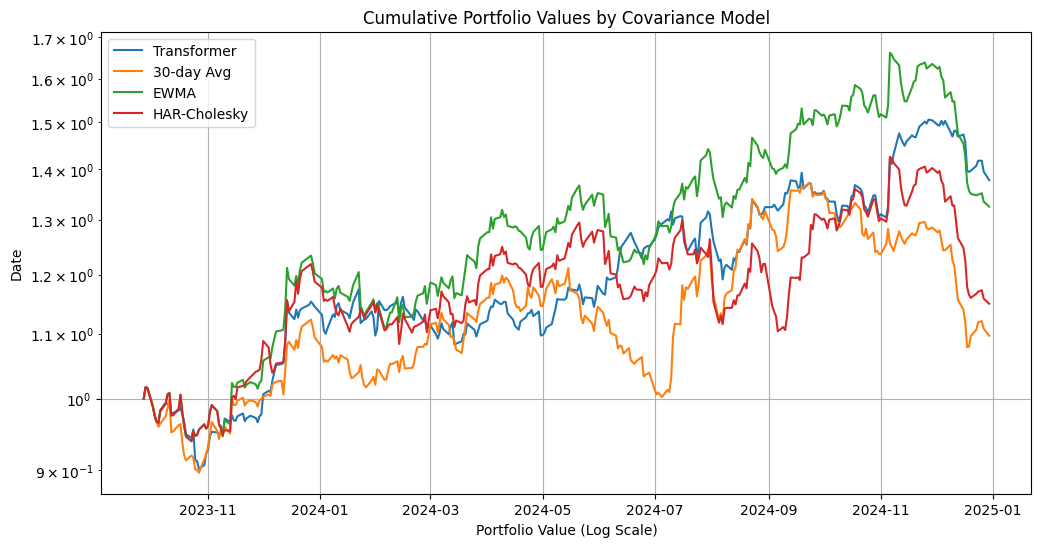

Final Portfolio Values:
Transformer     1.378407
30-day Avg      1.096808
EWMA            1.325662
HAR-Cholesky    1.149665
Name: 2024-12-30 00:00:00, dtype: object


In [503]:
# Parameters
tc_rate = 0.001

# Initialize results
portfolio_values_tc = pd.DataFrame(index=test_ret.index[-len(X_test)-1:], columns=models.keys())
portfolio_values_tc.iloc[0] = 1.0  # Start with $1 for each strategy
prev_weights = {model: None for model in models.keys()}

# Daily rebalancing
for i in range(len(X_test)):
    current_date = test_ret.index[-len(X_test)+i]

    expected_rets = test_ret.iloc[-len(X_test)+i-lookback:-len(X_test)+i].mean().values

    daily_rets = test_ret.iloc[-len(X_test)+i].values

    for model in models.keys():
        try:
            if model == 'Transformer':
                cov_matrix = models[model][i][0]
            else:
                cov_matrix = models[model][i]

            # Optimize weights
            weights = max_sharpe_weights(expected_rets, cov_matrix, risk_free_rate)

            if prev_weights[model] is not None:
                turnover = np.sum(np.abs(weights - prev_weights[model]))
            else:
                turnover = np.sum(np.abs(weights))  # Initial allocation cost

            cost = tc_rate * turnover * portfolio_values_tc.iloc[i][model]

            # Calculate portfolio return after cost
            port_return = np.dot(weights, daily_rets)
            new_value = (portfolio_values_tc.iloc[i][model] - cost) * (1 + port_return)

            # Update values and store weights
            portfolio_values_tc.loc[current_date, model] = new_value
            prev_weights[model] = weights.copy()

        except Exception as e:
            # Fallback to previous value without changing weights
            portfolio_values_tc.loc[current_date, model] = portfolio_values_tc.iloc[i][model]


# Plot results
plt.figure(figsize=(12, 6))
for model in models.keys():
    plt.plot(portfolio_values_tc.index, portfolio_values_tc[model], label=model)

plt.title('Cumulative Portfolio Values by Covariance Model')
plt.xlabel('Portfolio Value (Log Scale)')
plt.ylabel('Date')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Print performance metrics
print("Final Portfolio Values:")
print(portfolio_values_tc.iloc[-1])

SPY

In [504]:
spy = yf.download('SPY.MX', '2023-09-27', '2024-12-31', auto_adjust=True)
spy_ret = spy['Close'].pct_change().fillna(0)
spy_values = (1+spy_ret).cumprod()
portfolio_values['SPY'] = spy_values['SPY.MX']
portfolio_values = portfolio_values.fillna(method='ffill')

[*********************100%***********************]  1 of 1 completed
<ipython-input-504-e9f08df78d84>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_values = portfolio_values.fillna(method='ffill')
<ipython-input-504-e9f08df78d84>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  portfolio_values = portfolio_values.fillna(method='ffill')


In [505]:
spy_tc = pd.DataFrame(index=spy_ret.index)
spy_tc['SPY'] = 1

for i in range(1, len(spy_ret)):
    spy_tc.iloc[i] = spy_tc.iloc[i - 1].values * (1 + spy_ret.iloc[i]).values
    spy_tc.iloc[i] *= (1 - tc_rate)

portfolio_values_tc['SPY'] = spy_tc['SPY']
portfolio_values_tc = portfolio_values_tc.fillna(method='ffill')

<ipython-input-505-3b228a1e1ec4>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.999228290901771' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  spy_tc.iloc[i] = spy_tc.iloc[i - 1].values * (1 + spy_ret.iloc[i]).values
<ipython-input-505-3b228a1e1ec4>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_values_tc = portfolio_values_tc.fillna(method='ffill')
<ipython-input-505-3b228a1e1ec4>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  portfolio_values_tc = portfolio_values_tc.fillna(method='ffill')


Without transaction cost

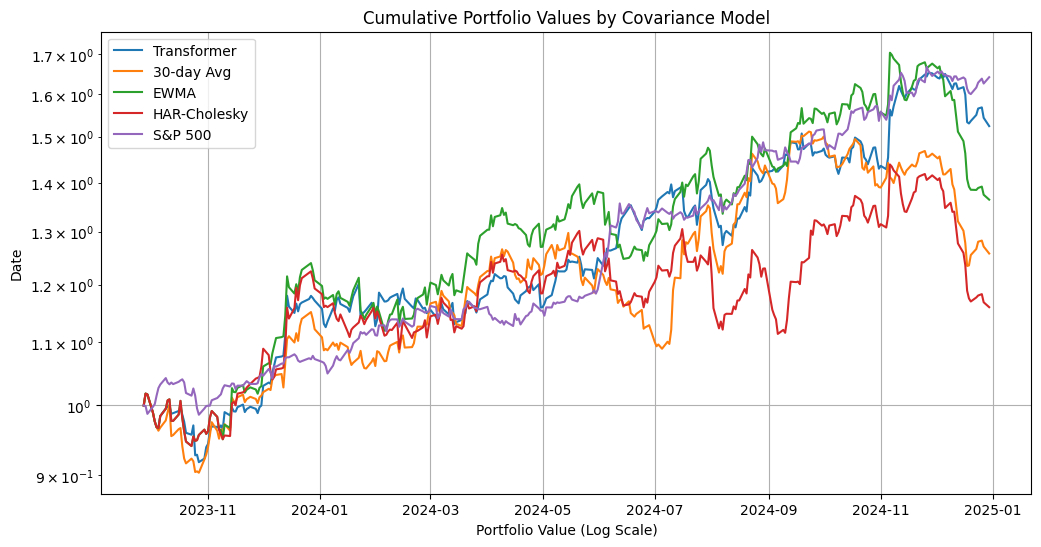

Final Portfolio Values:
Transformer     1.525053
30-day Avg      1.258022
EWMA            1.364708
HAR-Cholesky    1.160069
SPY             1.642003
Name: 2024-12-30 00:00:00, dtype: float64


In [506]:
plt.figure(figsize=(12, 6))
for model in models.keys():
    plt.plot(portfolio_values.index, portfolio_values[model], label=model)
plt.plot(portfolio_values.index, portfolio_values['SPY'], label='S&P 500')

plt.title('Cumulative Portfolio Values by Covariance Model')
plt.xlabel('Portfolio Value (Log Scale)')
plt.ylabel('Date')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Print performance metrics
print("Final Portfolio Values:")
print(portfolio_values.iloc[-1])

With transaction cost

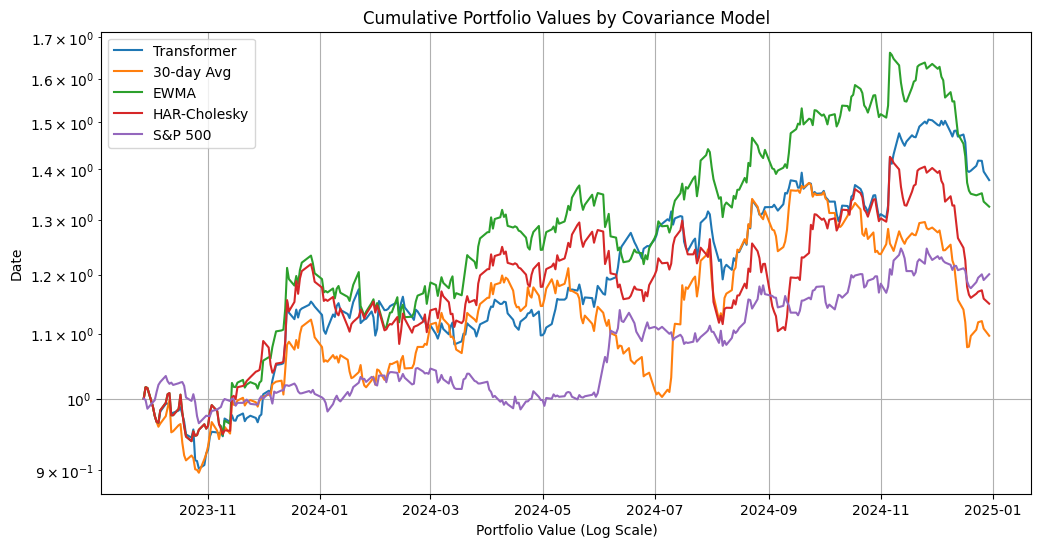

Final Portfolio Values:
Transformer     1.378407
30-day Avg      1.096808
EWMA            1.325662
HAR-Cholesky    1.149665
SPY             1.200526
Name: 2024-12-30 00:00:00, dtype: float64


In [507]:
plt.figure(figsize=(12, 6))
for model in models.keys():
    plt.plot(portfolio_values_tc.index, portfolio_values_tc[model], label=model)
plt.plot(portfolio_values_tc.index, portfolio_values_tc['SPY'], label='S&P 500')

plt.title('Cumulative Portfolio Values by Covariance Model')
plt.xlabel('Portfolio Value (Log Scale)')
plt.ylabel('Date')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Print performance metrics
print("Final Portfolio Values:")
print(portfolio_values_tc.iloc[-1])

Max Drawdown and Annualized Performance

Without transaction cost

In [508]:
def compute_max_drawdown(portfolio_series):
    """Calculate maximum drawdown and its duration"""
    peak = portfolio_series.expanding(min_periods=1).max()
    drawdown = (portfolio_series - peak) / peak
    max_drawdown = drawdown.min()
    trough_idx = drawdown.idxmin()
    peak_idx = portfolio_series[:trough_idx].idxmax()
    recovery_idx = portfolio_series[trough_idx:].idxmax() if (portfolio_series[trough_idx:] > portfolio_series[peak_idx]).any() else None

    return {
        'max_drawdown': abs(max_drawdown),
        'peak_date': peak_idx,
        'trough_date': trough_idx,
        'recovery_date': recovery_idx,
        'duration': (trough_idx - peak_idx).days if recovery_idx is None else (recovery_idx - peak_idx).days
    }

# Calculate and print results
print("\nMaximum Drawdown Analysis:")
for model in models.keys():
    result = compute_max_drawdown(portfolio_values[model])
    print(f"{model}:")
    print(f"  Max Drawdown: {result['max_drawdown']*100:.2f}%")
    print(f"  Peak Date: {result['peak_date'].strftime('%Y-%m-%d')}")
    print(f"  Trough Date: {result['trough_date'].strftime('%Y-%m-%d')}")
    if result['recovery_date']:
        print(f"  Recovery Date: {result['recovery_date'].strftime('%Y-%m-%d')}")
    print(f"  Duration: {result['duration']} days\n")

result = compute_max_drawdown(portfolio_values['SPY'])
print("S&P 500:")
print(f"  Max Drawdown: {result['max_drawdown']*100:.2f}%")
print(f"  Peak Date: {result['peak_date'].strftime('%Y-%m-%d')}")
print(f"  Trough Date: {result['trough_date'].strftime('%Y-%m-%d')}")
if result['recovery_date']:
    print(f"  Recovery Date: {result['recovery_date'].strftime('%Y-%m-%d')}")
print(f"  Duration: {result['duration']} days\n")


Maximum Drawdown Analysis:
Transformer:
  Max Drawdown: 9.84%
  Peak Date: 2023-09-28
  Trough Date: 2023-10-27
  Recovery Date: 2024-11-27
  Duration: 426 days

30-day Avg:
  Max Drawdown: 18.38%
  Peak Date: 2024-09-23
  Trough Date: 2024-12-18
  Duration: 86 days

EWMA:
  Max Drawdown: 19.91%
  Peak Date: 2024-11-06
  Trough Date: 2024-12-30
  Duration: 54 days

HAR-Cholesky:
  Max Drawdown: 19.40%
  Peak Date: 2024-11-06
  Trough Date: 2024-12-30
  Duration: 54 days

S&P 500:
  Max Drawdown: 5.39%
  Peak Date: 2023-10-09
  Trough Date: 2023-10-27
  Recovery Date: 2024-11-26
  Duration: 414 days



In [509]:
def annualized_performance(portfolio_values, risk_free_rate=0.044, trading_days=252):
    """
    Calculate annualized return, volatility, and Sharpe ratio
    for all portfolio strategies.
    """
    results = {}

    # Calculate daily returns for all strategies
    daily_returns = portfolio_values.pct_change().dropna()

    for strategy in daily_returns.columns:
        # Annualized return (geometric)
        total_return = portfolio_values[strategy].iloc[-1] / portfolio_values[strategy].iloc[0]
        annualized_return = (total_return ** (trading_days/len(daily_returns))) - 1

        # Annualized volatility
        annualized_vol = daily_returns[strategy].std() * np.sqrt(trading_days)

        # Sharpe ratio
        excess_return = daily_returns[strategy].mean() - risk_free_rate/trading_days
        sharpe = excess_return / daily_returns[strategy].std() * np.sqrt(trading_days)

        results[strategy] = {
            'Annualized Return': annualized_return,
            'Annualized Volatility': annualized_vol,
            'Sharpe Ratio': sharpe
        }

    return pd.DataFrame(results).T

# Compute performance metrics
performance_df = annualized_performance(portfolio_values)

# Format and display results
(performance_df.style
 .format({
     'Annualized Return': '{:.2%}',
     'Annualized Volatility': '{:.2%}',
     'Sharpe Ratio': '{:.2f}'
 })
 .set_caption('Portfolio Performance Metrics (Annualized)'))

,Annualized Return,Annualized Volatility,Sharpe Ratio
Transformer,40.01%,21.89%,1.45
30-day Avg,20.09%,23.85%,0.70
EWMA,28.14%,25.11%,0.94
HAR-Cholesky,12.57%,25.95%,0.42
SPY,48.51%,14.17%,2.55


With transaction cost

In [510]:
print("\nMaximum Drawdown Analysis:")
for model in models.keys():
    result = compute_max_drawdown(portfolio_values_tc[model])
    print(f"{model}:")
    print(f"  Max Drawdown: {result['max_drawdown']*100:.2f}%")
    print(f"  Peak Date: {result['peak_date'].strftime('%Y-%m-%d')}")
    print(f"  Trough Date: {result['trough_date'].strftime('%Y-%m-%d')}")
    if result['recovery_date']:
        print(f"  Recovery Date: {result['recovery_date'].strftime('%Y-%m-%d')}")
    print(f"  Duration: {result['duration']} days\n")

result = compute_max_drawdown(portfolio_values_tc['SPY'])
print("S&P 500:")
print(f"  Max Drawdown: {result['max_drawdown']*100:.2f}%")
print(f"  Peak Date: {result['peak_date'].strftime('%Y-%m-%d')}")
print(f"  Trough Date: {result['trough_date'].strftime('%Y-%m-%d')}")
if result['recovery_date']:
    print(f"  Recovery Date: {result['recovery_date'].strftime('%Y-%m-%d')}")
print(f"  Duration: {result['duration']} days\n")


Maximum Drawdown Analysis:
Transformer:
  Max Drawdown: 11.27%
  Peak Date: 2023-09-28
  Trough Date: 2023-10-27
  Recovery Date: 2024-11-27
  Duration: 426 days

30-day Avg:
  Max Drawdown: 21.43%
  Peak Date: 2024-09-23
  Trough Date: 2024-12-18
  Duration: 86 days

EWMA:
  Max Drawdown: 20.23%
  Peak Date: 2024-11-06
  Trough Date: 2024-12-30
  Duration: 54 days

HAR-Cholesky:
  Max Drawdown: 19.40%
  Peak Date: 2024-11-06
  Trough Date: 2024-12-30
  Duration: 54 days

S&P 500:
  Max Drawdown: 6.70%
  Peak Date: 2023-10-09
  Trough Date: 2023-10-27
  Recovery Date: 2024-11-12
  Duration: 400 days



In [511]:
performance_df = annualized_performance(portfolio_values_tc)

# Format and display results
(performance_df.style
 .format({
     'Annualized Return': '{:.2%}',
     'Annualized Volatility': '{:.2%}',
     'Sharpe Ratio': '{:.2f}'
 })
 .set_caption('Portfolio Performance Metrics (Annualized)'))

,Annualized Return,Annualized Volatility,Sharpe Ratio
Transformer,29.17%,21.84%,1.08
30-day Avg,7.65%,23.89%,0.24
EWMA,25.21%,25.09%,0.85
HAR-Cholesky,11.76%,25.94%,0.39
SPY,15.69%,14.16%,0.79
